<a href="https://colab.research.google.com/github/arturbernardo/data_roads/blob/main/data_roads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import geopandas as gpd


In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
uri = "https://gist.githubusercontent.com/jaumpedro214/8524d59a2e7791c504eda0783975bcb0/raw/810b46a61fe909ca0a8416d762928e230fe8aa8c/rodovias_federais_brasil.json"
!wget -U "Mozilla" -O georoads.json {uri}

--2025-05-03 23:59:20--  https://gist.githubusercontent.com/jaumpedro214/8524d59a2e7791c504eda0783975bcb0/raw/810b46a61fe909ca0a8416d762928e230fe8aa8c/rodovias_federais_brasil.json
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9396202 (9.0M) [text/plain]
Saving to: ‘georoads.json’

georoads.json       100%[===================>]   8.96M  42.4MB/s    in 0.2s    

2025-05-03 23:59:20 (42.4 MB/s) - ‘georoads.json’ saved [9396202/9396202]



In [6]:
# path = "/content/demostrativo_acidentes_ecosul.csv"
path = '/content/demostrativo_acidentes_viasul.csv'

df = pd.read_csv(path, sep=";",encoding="latin-1", engine='python')

In [7]:
df.columns

Index(['data', 'horario', 'n_da_ocorrencia', 'tipo_de_ocorrencia', 'km',
       'trecho', 'sentido', 'tipo_de_acidente', 'automovel', 'bicicleta',
       'caminhao', 'moto', 'onibus', 'outros', 'tracao_animal',
       'transporte_de_cargas_especiais', 'trator_maquinas', 'utilitarios',
       'ilesos', 'levemente_feridos', 'moderadamente_feridos',
       'gravemente_feridos', 'mortos'],
      dtype='object')

In [8]:
df

,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos
0,01/04/2019,09:44:00,52,Sem vítima,95,BR-290/RS,Oeste,Colisão - Traseira,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0
1,01/04/2019,07:07:00,125,com vítima,72,BR-290/RS,Oeste,Choque com objeto sobre a pista,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,02/04/2019,01:50:00,4,com vítima,40,BR-290/RS,Oeste,Queda de ribanceira,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,04/04/2019,03:35:00,22,com vítima,80,BR-290/RS,Oeste,Tombamento,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,04/04/2019,07:23:00,37,com vítima,46,BR-290/RS,Leste,Queda de moto,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16955,21/02/2025,09:13:09,122,Com vítima,"95,000",BR-290/RS,Crescente,Colisão traseira,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
16956,23/02/2025,02:29:39,137,Com vítima,"310,000",BR-386/RS,Crescente,Acidentes de outra natureza,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
16957,23/02/2025,06:06:25,209,Com vítima,"19,000",BR-101/RS,Decrescente,Queda de moto,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
16958,23/02/2025,10:07:58,267,Com vítima,"349,000",BR-386/RS,Crescente,Queda de moto,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [9]:
tipo = df['km'].dtype
print(tipo)

object


In [10]:
df['km']

,km
0,95
1,72
2,40
3,80
4,46
...,...
16955,"95,000"
16956,"310,000"
16957,"19,000"
16958,"349,000"


In [11]:
# df['km_c'] = (
#     df['km']
#     .astype(str)
#     .str.split(',', n=1).str[0]
#     .str.replace(r'\D', '', regex=True)
#     .astype('Int64')
# )

df['km_c'] = (
    df['km']
    .astype(str)  # Assegura que os valores sejam strings
    .str.replace(r'[.,].*', '', regex=True)  # Remove tudo após o ponto ou vírgula
    .str.replace(r'\D', '', regex=True)  # Remove qualquer caractere não numérico
    .astype('Int64')  # Converte para inteiro
)

In [47]:
y = df['trecho'].unique()
print(y)

['BR-290/RS' 'BR-386/RS' 'BR-101/RS' 'BR-448/RS']


In [12]:
df_386 = df[df['trecho'] == 'BR-386/RS']

In [33]:
df_386 = df_386[df_386['mortos'] > 0]

In [44]:
x = df_386['mortos'].sum()
print(x)

177


In [42]:
df_386

,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,km_c
458,30/08/2019,04:11:00,5,com vítima,238,BR-386/RS,Sul,Colisão - Frontal,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,238
498,05/09/2019,08:02:00,36,com vítima,429,BR-386/RS,Sul,Queda de ribanceira,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,429
504,05/09/2019,06:50:00,174,com vítima,271,BR-386/RS,Sul,Atropelamento - Andarilho,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,271
509,06/09/2019,03:11:00,117,com vítima,332,BR-386/RS,Norte,Colisão - Frontal,2,0,1,0,0,0,0,0,0,0,3,2,0,0,1,332
558,11/09/2019,07:37:00,159,com vítima,367,BR-386/RS,Norte,Atropelamento - Morador/Trabalhador/Estudante,1,0,0,0,0,0,0,0,0,0,3,0,0,0,1,367
660,22/09/2019,09:02:00,210,com vítima,216,BR-386/RS,Sul,Atropelamento - Andarilho,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,216
694,28/09/2019,12:39:00,2,com vítima,274,BR-386/RS,Sul,Atropelamento - Andarilho,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,274
724,01/10/2019,05:11:00,14,com vítima,406.14,BR-386/RS,Norte,Colisão - Traseira,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,406
786,07/10/2019,07:21:00,33,com vítima,443,BR-386/RS,Norte,Colisão - Frontal,2,0,0,1,0,0,0,0,0,0,1,3,0,0,1,443
1021,03/11/2019,06:11:00,16,com vítima,209,BR-386/RS,Sul,Colisão - Frontal,1,0,0,0,1,0,0,0,0,0,0,15,3,3,1,209


In [14]:
rodovias = gpd.read_file("/content/georoads.json")
# rodovias = rodovias.to_crs(epsg=4674)
rodovias = rodovias.to_crs(epsg=3857)

In [15]:
rodovias = rodovias[rodovias['vl_br'] == '386']

In [16]:
rodovias

,id_trecho_,vl_br,sg_uf,nm_tipo_tr,sg_tipo_tr,desc_coinc,vl_codigo,ds_local_i,ds_local_f,vl_km_inic,vl_km_fina,vl_extensa,ds_sup_fed,ds_obra,ul,ds_coinc,ds_tipo_ad,ds_ato_leg,est_coinc,sup_est_co,ds_jurisdi,ds_superfi,ds_legenda,sg_legenda,leg_multim,versao_snv,id_versao,marcador,shape_Leng,InLine_FID,SimLnFlag,MaxSimpTol,MinSimpTol,geometry
5970,156326,386,RS,Eixo Principal,B,Coinc,386BRS0070,ENTR BR-386(A) (DIV SC/RS)(INÍCIO PONTE S/RIO ...,FIM PONTE S/RIO URUGUAI,0.0,1.0,1.0,PAV,,Cruz Alta,158BRS1110;386BRS0070,Federal,,,,Federal,PAV,Pavimentada,PAV,Pavimentada,202210C,67,|,0.009521,5913,0,0.000009,0.000009,"LINESTRING (-5924994.93 -3144604.337, -5925756..."
5984,158199,386,RS,Eixo Principal,B,Coinc,386BRS0080,FIM PONTE S/RIO URUGUAI,ENTR RS-324 (P/PLANALTO),1.0,2.6,1.6,PAV,,Cruz Alta,158BRS1115;386BRS0080,Federal,,,,Federal,PAV,Pavimentada,PAV,Pavimentada,202210C,67,|,0.015395,5914,0,0.000009,0.000009,"LINESTRING (-5925756.795 -3145431.054, -592675..."
5991,156327,386,RS,Eixo Principal,B,Coinc,386BRS0090,ENTR RS-324 (P/PLANALTO),ACESSO A IRAÍ,2.6,4.9,2.3,PAV,,Cruz Alta,158BRS1120;386BRS0090,Federal,,,,Federal,PAV,Pavimentada,PAV,Pavimentada,202210C,67,|,0.023133,5915,0,0.000009,0.000009,"LINESTRING (-5927097.646 -3146173.389, -592796..."
5992,156328,386,RS,Eixo Principal,B,Coinc,386BRS0095,ACESSO A IRAÍ,ENTR RS-150 (P/CAIÇARA),4.9,32.1,27.2,PAV,,Cruz Alta,158BRS1130;386BRS0095,Federal,,,,Federal,PAV,Pavimentada,PAV,Pavimentada,202210C,67,|,0.258285,5916,0,0.000009,0.000009,"LINESTRING (-5929396.113 -3147193.851, -593171..."
6032,156333,386,RS,Eixo Principal,B,Coinc,386BRS0125,ENTR RS-323 (P/JABOTICABA),ENTR BR-158(B),71.9,74.9,3.0,PAV,,Cruz Alta,158BRS1165;386BRS0125,Federal,,,,Federal,PAV,Pavimentada,PAV,Pavimentada,202210C,67,|,0.026476,5921,0,0.000009,0.000009,"LINESTRING (-5934920.417 -3206454.513, -593471..."
6033,158185,386,RS,Eixo Principal,B,-,386BRS0130,ENTR BR-158(B),ENTR RS-500,74.9,113.2,38.3,PAV,,Passo Fundo,386BRS0130,Federal,,,,Federal,PAV,Pavimentada,PAV,Pavimentada,202210C,67,|,0.372947,5922,0,0.000009,0.000009,"LINESTRING (-5934216.915 -3209424.216, -593327..."
6034,156329,386,RS,Eixo Principal,B,Coinc,386BRS0100,ENTR RS-150 (P/CAIÇARA),ENTR RS-591 (FREDERICO WESTPHALEN),32.1,34.7,2.6,PAV,,Cruz Alta,158BRS1140;386BRS0100,Federal,,,,Federal,PAV,Pavimentada,PAV,Pavimentada,202210C,67,|,0.024458,5917,0,0.000009,0.000009,"LINESTRING (-5943207.175 -3166456.585, -594295..."
6035,156330,386,RS,Eixo Principal,B,Coinc,386BRS0105,ENTR RS-591 (FREDERICO WESTPHALEN),ENTR BR-472 (P/PALMITINHO),34.7,42.2,7.5,PAV,,Cruz Alta,158BRS1145;386BRS0105,Federal,,,,Federal,PAV,Pavimentada,PAV,Pavimentada,202210C,67,|,0.069039,5918,0,0.000009,0.000009,"LINESTRING (-5943763.176 -3169070.954, -594414..."
6036,156336,386,RS,Eixo Principal,B,-,386BRS0155,ENTR RS-404 (SARANDI),ENTR BR-377(A)/AV. FLORES DA CUNHA (CARAZINHO),135.3,176.0,40.7,PAV,,Passo Fundo,386BRS0155,Federal,,,,Federal,PAV,Pavimentada,PAV,Pavimentada,202210C,67,|,0.381299,5925,0,0.000009,0.000009,"LINESTRING (-5890602.356 -3243144.995, -588983..."
6037,156337,386,RS,Eixo Principal,B,Coinc,386BRS0170,ENTR BR-377(A)/AV. FLORES DA CUNHA (CARAZINHO),ENTR BR-285/377(B) (P/PASSO FUNDO),176.0,180.2,4.2,PAV,,Passo Fundo,377BRS0010;386BRS0170,Federal,,,,Federal,PAV,Pavimentada,PAV,Pavimentada,202210C,67,|,0.040248,5926,0,0.000009,0.000009,"LINESTRING (-5874434.478 -3283619.772, -587388..."


In [17]:
from shapely.geometry import Point

def ponto_por_km(rodovia_linha, km, km_total):
    frac = km / km_total
    if frac < 0: frac = 0
    if frac > 1: frac = 1
    return rodovia_linha.interpolate(frac, normalized=True)

In [25]:
from shapely.ops import linemerge, unary_union
from shapely.geometry import LineString, MultiLineString

In [36]:
from tqdm import tqdm  # para mostrar barra de progresso

nome = '386'
acidente_coords = []
linha_rodovia = rodovias[rodovias["vl_br"] == nome]  # ajuste o nome da coluna
multi = unary_union(linha_rodovia.geometry)

for _, ac in tqdm(df_386.iterrows(), total=len(df_386)):
    km = ac["km_c"]

    # Seleciona a linha da rodovia correspondente
    # linha_rodovia = rodovias[rodovias["vl_br"] == nome]  # ajuste o nome da coluna
    # if linha_rodovia.empty:
    #     continue

    # linha = linha_rodovia.iloc[0].geometry
    comprimento = multi.length  # em graus (se não for projetado)

    ponto = ponto_por_km(multi, km, km_total=525)  # ajuste se souber o km total real
    acidente_coords.append(ponto)





100%|██████████| 146/146 [00:00<00:00, 4897.22it/s]


In [37]:
acidente_coords

[<POINT (-5897247.133 -3236673.423)>,
 <POINT (-5709836.119 -3483091.856)>,
 <POINT (-5826548.606 -3376478.532)>,
 <POINT (-5795442.108 -3423100.383)>,
 <POINT (-5752407.719 -3465399.578)>,
 <POINT (-5938710.858 -3196736.461)>,
 <POINT (-5824075.452 -3378559.864)>,
 <POINT (-5734509.361 -3478041.913)>,
 <POINT (-5696882.567 -3490309.538)>,
 <POINT (-5941622.078 -3189523.506)>,
 <POINT (-5730606.007 -3479980.857)>,
 <POINT (-5820605.229 -3383813.941)>,
 <POINT (-5779828.083 -3443561.86)>,
 <POINT (-5805878.297 -3405744.1)>,
 <POINT (-5697090.706 -3493701.265)>,
 <POINT (-5759611.906 -3460555.638)>,
 <POINT (-5903509.335 -3226937.074)>,
 <POINT (-5731722.147 -3479782.894)>,
 <POINT (-5735595.955 -3477775.783)>,
 <POINT (-5832460.162 -3363970.389)>,
 <POINT (-5823075.098 -3379002.644)>,
 <POINT (-5937707.607 -3202180.909)>,
 <POINT (-5787412.207 -3431877.976)>,
 <POINT (-5900581.874 -3232616.454)>,
 <POINT (-5828275.428 -3375239.728)>,
 <POINT (-5891682.456 -3242829.221)>,
 <POINT (-57048

In [38]:
# Criar GeoDataFrame dos acidentes
import geopandas as gpd

gdf_acidentes = gpd.GeoDataFrame(df_386, geometry=acidente_coords, crs=rodovias.crs)


In [39]:
gdf_acidentes

,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,km_c,geometry
458,30/08/2019,04:11:00,5,com vítima,238,BR-386/RS,Sul,Colisão - Frontal,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,238,POINT (-5897247.133 -3236673.423)
498,05/09/2019,08:02:00,36,com vítima,429,BR-386/RS,Sul,Queda de ribanceira,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,429,POINT (-5709836.119 -3483091.856)
504,05/09/2019,06:50:00,174,com vítima,271,BR-386/RS,Sul,Atropelamento - Andarilho,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,271,POINT (-5826548.606 -3376478.532)
509,06/09/2019,03:11:00,117,com vítima,332,BR-386/RS,Norte,Colisão - Frontal,2,0,1,0,0,0,0,0,0,0,3,2,0,0,1,332,POINT (-5795442.108 -3423100.383)
558,11/09/2019,07:37:00,159,com vítima,367,BR-386/RS,Norte,Atropelamento - Morador/Trabalhador/Estudante,1,0,0,0,0,0,0,0,0,0,3,0,0,0,1,367,POINT (-5752407.719 -3465399.578)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15876,08/10/2024,07:27:10,74,Com vítima,"362,000",BR-386/RS,Crescente,Capotamento,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,362,POINT (-5771602.959 -3449059.093)
16107,06/11/2024,07:15:06,277,Com vítima,"434,100",BR-386/RS,Crescente,Acidentes de outra natureza,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,434,POINT (-5705372.835 -3486222.747)
16114,07/11/2024,12:44:07,208,Com vítima,"442,000",BR-386/RS,Decrescente,Colisão frontal,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,442,POINT (-5697594.054 -3489829.02)
16340,04/12/2024,08:51:04,121,Com vítima,"180,100",BR-386/RS,Decrescente,Colisão lateral no mesmo sentido,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,180,POINT (-5850397.987 -3341538.582)


In [53]:
gdf_acidentes_x = gdf_acidentes[gdf_acidentes['tipo_de_acidente'] == 'Colisão - Frontal']

In [54]:
gdf_acidentes_x

,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,km_c,geometry
458,30/08/2019,04:11:00,5,com vítima,238,BR-386/RS,Sul,Colisão - Frontal,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,238,POINT (-5897247.133 -3236673.423)
509,06/09/2019,03:11:00,117,com vítima,332,BR-386/RS,Norte,Colisão - Frontal,2,0,1,0,0,0,0,0,0,0,3,2,0,0,1,332,POINT (-5795442.108 -3423100.383)
786,07/10/2019,07:21:00,33,com vítima,443,BR-386/RS,Norte,Colisão - Frontal,2,0,0,1,0,0,0,0,0,0,1,3,0,0,1,443,POINT (-5696882.567 -3490309.538)
1021,03/11/2019,06:11:00,16,com vítima,209,BR-386/RS,Sul,Colisão - Frontal,1,0,0,0,1,0,0,0,0,0,0,15,3,3,1,209,POINT (-5941622.078 -3189523.506)
1545,29/12/2019,03:01:00,15,com vítima,227,BR-386/RS,Sul,Colisão - Frontal,1,0,1,0,0,0,0,0,0,0,0,2,1,0,1,227,POINT (-5903509.335 -3226937.074)
1729,15/01/2020,05:52:00,211,com vítima,405,BR-386/RS,Norte,Colisão - Frontal,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,405,POINT (-5735595.955 -3477775.783)
1840,27/01/2020,04:50:00,216,com vítima,258,BR-386/RS,Norte,Colisão - Frontal,1,0,0,1,0,0,0,0,0,0,2,0,0,0,1,258,POINT (-5832460.162 -3363970.389)
2212,13/03/2020,12:20:00,1,com vítima,323,BR-386/RS,Norte,Colisão - Frontal,0,0,0,1,0,1,0,0,0,0,1,0,0,0,2,323,POINT (-5787412.207 -3431877.976)
2414,27/04/2020,08:46:00,44,com vítima,395,BR-386/RS,Sul,Colisão - Frontal,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,395,POINT (-5744648.097 -3471363.872)
2599,28/05/2020,07:11:00,24,com vítima,359,BR-386/RS,Norte,Colisão - Frontal,1,0,1,0,0,0,0,0,0,0,0,1,0,0,2,359,POINT (-5774724.415 -3447790.379)


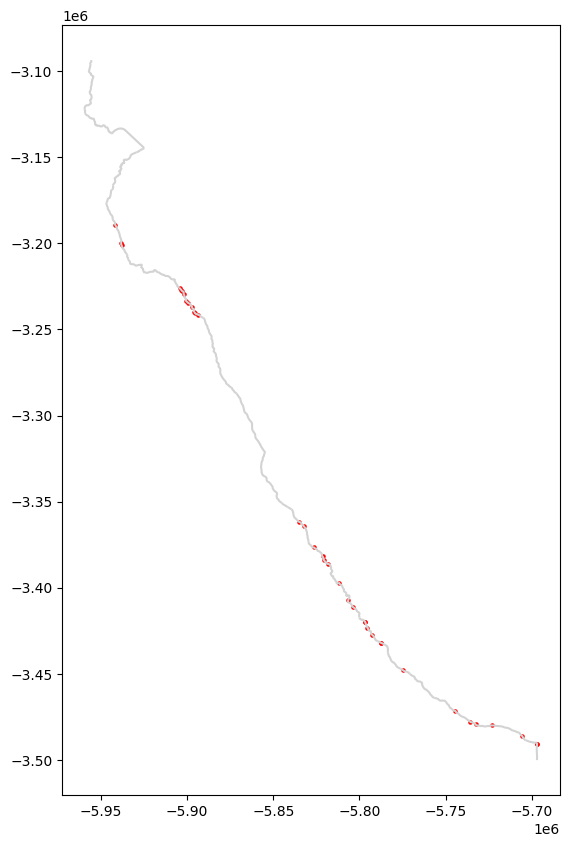

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
rodovias.plot(ax=ax, color='lightgray')
gdf_acidentes_x.plot(ax=ax, color='red', markersize=5)
plt.show()


In [ ]:
gdf_acidentes_x.geometry.x

In [ ]:
import plotly.graph_objects as go
gdf_acidentes_x['im_exists'] = 10
fig = go.Figure(go.Densitymapbox(lat=gdf_acidentes_x.geometry.y, lon=gdf_acidentes_x.geometry.x, z=gdf_acidentes_x['im_exists'],
                                 radius=5))
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=-51.9653, mapbox_center_lat=-29.4685)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(mapbox_zoom=12)
fig.show()


# -29.4685, Longitude: -51.9653

In [80]:
gdf_acidentes_x["hover"] = (
    gdf_acidentes_x["data"].astype(str) + "<br>" + "Mortos: " + gdf_acidentes_x["mortos"].astype(str) + "<br>" + gdf_acidentes_x["tipo_de_acidente"]
)

In [81]:
import plotly.graph_objects as go

# Certifique-se de que o GeoDataFrame está em WGS84 (lat/lon)
gdf_acidentes_x = gdf_acidentes_x.to_crs("EPSG:4326")

fig = go.Figure(go.Scattermapbox(
    lat=gdf_acidentes_x.geometry.y,
    lon=gdf_acidentes_x.geometry.x,
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=12,
        color='red'
    ),
    hovertext=gdf_acidentes_x['hover'],  # coluna a exibir
    hoverinfo='text'
))

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center={"lat": -29.4685, "lon": -51.9653},
    mapbox_zoom=12,
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

fig.show()
